<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
# RFM Analysis:
## Background and Context

**RFM Analysis** is a customer segmentation technique used to evaluate and categorize customers based on their transaction history. It helps businesses understand customer behavior and identify key customer segments for targeted marketing and customer retention efforts.

RFM stands for:
- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much a customer spends on purchases.

The goal of RFM analysis is to segment customers into meaningful categories based on these three metrics.

## Dataset Overview

The dataset contains:
- `customer_id`: Unique identifier for each customer.
- `trans_date`: The date on which the transaction occurred.
- `tran_amount`: The amount spent on each transaction.

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 1. Data Preparation

First, load the dataset and inspect its structure.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [4]:
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
head = df.head(5)
custcheck = df[df['customer_id'] == 'CS5295'].count()
display(head, custcheck, df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 124994 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  124994 non-null  object        
 1   trans_date   124994 non-null  datetime64[ns]
 2   tran_amount  124994 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.8+ MB


,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


customer_id    25
trans_date     25
tran_amount    25
dtype: int64

None

In [7]:
df['trans_date'].min()

Timestamp('2011-05-16 00:00:00')

In [8]:
reference_date = df['trans_date'].max() + dt.timedelta(days=1)

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 2. Calculate RFM Metrics

### Recency:
Recency represents how recently a customer made a purchase. It is calculated by taking the difference between the current reference date (which is the latest transaction date in the dataset) and the most recent transaction date for each customer.

### Frequency:
Frequency measures how often a customer makes purchases. It is calculated by counting the number of transactions made by each customer.

### Monetary:
Monetary represents the total amount spent by a customer. It is calculated by summing the transaction amounts for each customer.

At this stage, we group the dataset by `customer_id` and calculate the Recency, Frequency, and Monetary values for each customer.


In [9]:
# Aggregate the data with descriptive column names
rfm_df = df.groupby('customer_id').agg(
    Last_Purchase_Date=('trans_date', 'max'),  # Get the date of the most recent transaction
    Frequency=('trans_date', 'count'),         # Count the total number of transactions
    Monetary=('tran_amount', 'sum')            # Sum the total amount spent
).reset_index()

# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days

# Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary']]

# Display the resulting RFM dataframe
rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,CS1112,62,15,1012
1,CS1113,36,20,1490
2,CS1114,33,19,1432
3,CS1115,12,22,1659
4,CS1116,204,13,857


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 3. RFM Scoring

Once we have the RFM metrics, we assign a score between 1 and 5 for each metric. The scores are based on quintiles:
- **Recency**: Lower recency (more recent purchase) gets a higher score.
- **Frequency**: Higher frequency (more purchases) gets a higher score.
- **Monetary**: Higher monetary value (more money spent) gets a higher score.

These scores are then combined to create an RFM score for each customer.

In [10]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [11]:
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,CS1112,62,15,1012,3,2,2
1,CS1113,36,20,1490,4,4,4
2,CS1114,33,19,1432,4,3,4
3,CS1115,12,22,1659,5,4,5
4,CS1116,204,13,857,1,1,2
...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,2,1,1
6885,CS8997,262,14,543,1,2,1
6886,CS8998,85,13,624,2,1,1
6887,CS8999,258,12,383,1,1,1


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 4. Combine RFM Scores

The next step involves combining the Recency, Frequency, and Monetary scores into a single RFM score. This score is generated by concatenating the Recency, Frequency, and Monetary scores for each customer. The resulting RFM score gives a comprehensive view of a customer’s behavior in terms of their engagement and value.

In [12]:
rfm_df['RFM_Score'] = rfm_df.R_Score.astype(str) + rfm_df.F_Score.astype(str) + rfm_df.M_Score.astype(str)

rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,CS1112,62,15,1012,3,2,2,322
1,CS1113,36,20,1490,4,4,4,444
2,CS1114,33,19,1432,4,3,4,434
3,CS1115,12,22,1659,5,4,5,545
4,CS1116,204,13,857,1,1,2,112
...,...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,2,1,1,211
6885,CS8997,262,14,543,1,2,1,121
6886,CS8998,85,13,624,2,1,1,211
6887,CS8999,258,12,383,1,1,1,111


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 5. RFM Segmentation

We use the combined RFM scores to segment customers into different groups. Each segment represents a different type of customer behavior, based on their recency, frequency, and monetary scores.

Here are the common segments used in RFM analysis:
- **Hibernating**: Customers who haven’t purchased in a while and have low frequency and monetary values.
- **At Risk**: Previously engaged customers who haven’t purchased recently, indicating they may be at risk of churning.
- **Can't Lose**: Customers who spend a lot but have low recency, meaning they could churn.
- **About to Sleep**: Customers with medium recency and low frequency who may stop purchasing soon.
- **Need Attention**: Customers showing potential but require engagement to become more active.
- **Promising**: Newer customers with potential to become loyal or high-value.
- **Champions**: The best customers, purchasing frequently, recently, and spending the most.
- **New Customers**: Recently acquired customers who may still be exploring the brand.

We map each RFM score to these segments using predefined rules.

In [13]:
seg_map = {
    r'1[1-2]': 'hibernating',
    r'1[3-4]': 'at_Risk',
    r'15': 'cant_loose',
    r'2[1-2]': 'hibernating',
    r'2[3-4]': 'at_Risk',
    r'25': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'34': 'need_attention',
    r'35': 'promising',
    r'4[1-2]': 'promising',
    r'43': 'promising',
    r'44': 'promising',
    r'45': 'champions',
    r'51': 'new_customers',
    r'52': 'promising',
    r'53': 'promising',
    r'54': 'champions',
    r'55': 'champions'
}

rfm_df['segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str)

rfm_df['segment'] = rfm_df['segment'].replace(seg_map, regex=True)
rfm_df.sample(10)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,segment
5406,CS7518,125,16,747,2,2,2,222,hibernating
3364,CS4476,8,19,1223,5,3,3,533,promising
6181,CS8293,46,17,819,3,3,2,332,need_attention
6448,CS8560,126,14,756,2,2,2,222,hibernating
3538,CS4650,72,22,1599,3,4,5,345,need_attention
973,CS2085,174,25,1668,1,5,5,155,cant_loose
2933,CS4045,61,15,945,3,2,2,322,about_to_sleep
205,CS1317,19,16,1146,4,2,3,423,promising
5346,CS7458,6,14,553,5,2,1,521,promising
6239,CS8351,65,19,748,3,3,2,332,need_attention


In [14]:
rfm_df['segment'].value_counts()

segment
promising         1865
hibernating       1365
champions         1044
at_Risk           1011
need_attention     559
about_to_sleep     503
cant_loose         361
new_customers      181
Name: count, dtype: int64

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 6. Analyze the Segments

Once customers are segmented, we analyze each segment to understand their behavior:
- **Recency**: How recently customers in each segment have purchased.
- **Frequency**: How often customers in each segment make purchases.
- **Monetary**: How much customers in each segment spend.

This analysis provides insights into which customer groups need more attention and which are high-value, helping businesses tailor their marketing strategies.

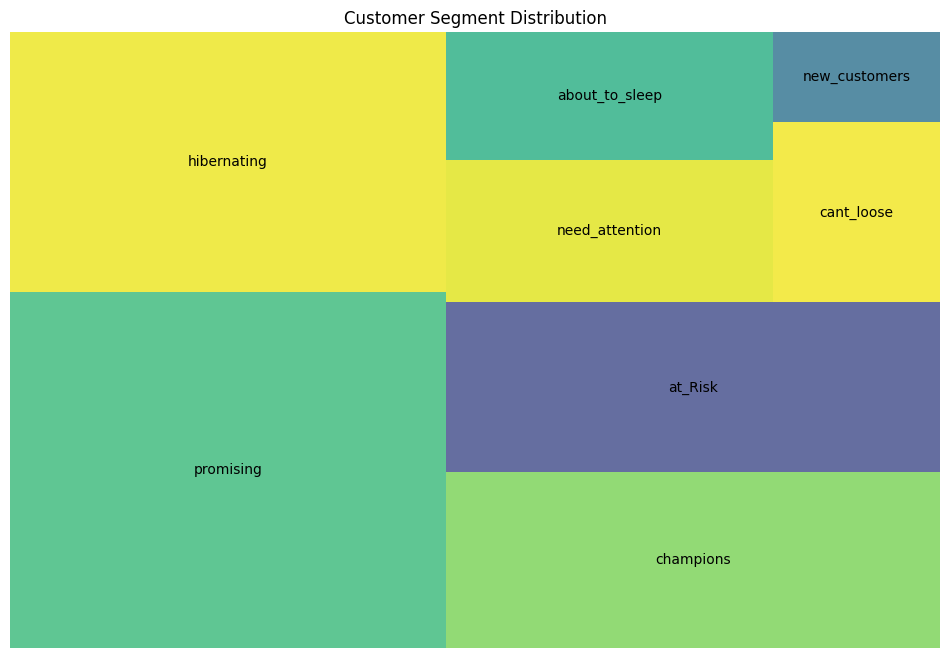

In [15]:
import squarify
import matplotlib.pyplot as plt

segment_counts = rfm_df['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=segment_counts['count'], label=segment_counts['segment'], alpha=0.8)
plt.axis('off')
plt.title('Customer Segment Distribution')
plt.show()

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
Export Segmented Dataset

In [16]:
rfm_df.to_csv('rfm.csv', index=False)

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body, 
div, 
h1, 
h2, 
h3, 
h4, 
h5, 
h6, 
p, 
span, 
label, 
input, 
textarea, 
button, 
pre, 
code, 
kbd, 
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## Conclusion

RFM analysis helps businesses understand their customer base by categorizing customers into distinct segments based on recency, frequency, and monetary value. This segmentation can be used to:
- Identify high-value customers and nurture relationships with them.
- Prevent at-risk customers from churning.
- Engage new and promising customers to boost loyalty and spending.
- Optimize marketing efforts by focusing on specific customer behaviors and needs.

# RFM Segmentation and Recommendations

## 1. Hibernating

### Characteristics:
- **Low Recency**: These customers haven't made a purchase in a long time.
- **Low Frequency**: They rarely engage or buy from the company.
- **Low Monetary**: Their spending has been minimal.

### Recommendation:
- **Re-engage these customers** with targeted win-back campaigns. Offer special promotions or discounts to encourage them to return. Consider sending personalized reminders or updates on new products they may be interested in. If they still show no interest, it may be time to reduce marketing spend on this group.

---

## 2. At Risk

### Characteristics:
- **Low Recency**: These customers haven't purchased recently.
- **Medium/High Frequency**: They used to engage frequently but have stopped.
- **Medium Monetary**: They have spent a decent amount but are not currently active.

### Recommendation:
- **Prevent churn** by offering loyalty incentives or personalized offers. Send them personalized emails or messages highlighting their past purchases and how they can benefit from new deals. Consider offering exclusive promotions to bring them back before they churn completely.

---

## 3. Can't Lose

### Characteristics:
- **Low Recency**: They haven't purchased recently.
- **Low Frequency**: They don’t purchase often.
- **High Monetary**: Despite their low engagement, they spend a lot when they do purchase.

### Recommendation:
- **Highly valuable customers that you cannot afford to lose**. Provide VIP treatment, such as special deals, early access to new products, or personalized services. Consider reaching out personally via phone or private messages to re-engage them and offer exclusive incentives for their next purchase.

---

## 4. About to Sleep

### Characteristics:
- **Medium Recency**: They purchased not too long ago but haven't been active recently.
- **Low Frequency**: They don’t make purchases often.
- **Low Monetary**: Their spending is low.

### Recommendation:
- **Encourage them to become more active** before they churn. Provide limited-time offers, free shipping, or small incentives that encourage repeat purchases. Consider using remarketing techniques such as retargeted ads or personalized emails reminding them of products they viewed.

---

## 5. Need Attention

### Characteristics:
- **Medium Recency**: They are somewhat engaged but not fully.
- **Medium Frequency**: They make purchases occasionally.
- **Medium Monetary**: They spend a moderate amount but could spend more.

### Recommendation:
- **Build loyalty** by providing personalized attention and tailored offers. Show them they are valued customers with loyalty points or exclusive offers on products they’ve shown interest in. Consider a follow-up email or message after their next purchase to strengthen the relationship and increase engagement.

---

## 6. Promising

### Characteristics:
- **Medium/High Recency**: They’ve purchased recently.
- **Medium Frequency**: They show signs of being frequent purchasers.
- **Medium Monetary**: They’re starting to spend more and show potential for higher value.

### Recommendation:
- **Nurture these customers** and push them towards becoming loyal or high-value customers. Offer incentives for repeat purchases, such as membership programs, loyalty rewards, or referral discounts. Keep them engaged with regular communication, such as product updates, offers, and personalized recommendations.

---

## 7. Champions

### Characteristics:
- **High Recency**: They’ve purchased very recently.
- **High Frequency**: They are frequent buyers.
- **High Monetary**: They spend a lot and are your most valuable customers.

### Recommendation:
- **Reward and retain these customers** by offering VIP benefits, exclusive deals, or early access to new products. These customers are your biggest advocates, so keep them engaged with personalized offers, referral programs, and unique experiences. Make sure they feel valued with exceptional customer service and continue to strengthen your relationship.

---

## 8. New Customers

### Characteristics:
- **High Recency**: They’ve just made their first purchase.
- **Low Frequency**: They haven’t had time to make more purchases yet.
- **Low/Medium Monetary**: Their spending may vary as they are still exploring the brand.

### Recommendation:
- **Encourage repeat purchases** by engaging them immediately with follow-up messages, onboarding emails, or welcome discounts. Send them personalized recommendations based on their first purchase to build loyalty early on. Make the post-purchase experience exceptional to ensure they return and become loyal customers.
